In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = "SimHei" #解决中文乱码问题
import seaborn as sns
import random
import seaborn as sns
from plotnine import * 
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## 模型架构 

### 原始数据信息

In [2]:
train = pd.read_csv(r'C:\Users\86181\Desktop\Learning\programming\ML\data_format2\train.csv')
train.head(10)
test = pd.read_csv(r'C:\Users\86181\Desktop\Learning\programming\ML\data_format2\test.csv')
#test.head()

In [8]:
train.info()
train.isnull().sum(axis=0)
#train无缺失值，数据完整

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22500 non-null  int64  
 1   age               22500 non-null  int64  
 2   job               22500 non-null  object 
 3   marital           22500 non-null  object 
 4   education         22500 non-null  object 
 5   default           22500 non-null  object 
 6   housing           22500 non-null  object 
 7   loan              22500 non-null  object 
 8   contact           22500 non-null  object 
 9   month             22500 non-null  object 
 10  day_of_week       22500 non-null  object 
 11  duration          22500 non-null  int64  
 12  campaign          22500 non-null  int64  
 13  pdays             22500 non-null  int64  
 14  previous          22500 non-null  int64  
 15  poutcome          22500 non-null  object 
 16  emp_var_rate      22500 non-null  float6

id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
subscribe           0
dtype: int64

In [52]:
test.info()
test.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7500 non-null   int64  
 1   job               7500 non-null   int64  
 2   marital           7500 non-null   int64  
 3   education         7500 non-null   int64  
 4   default           7500 non-null   int64  
 5   housing           7500 non-null   int64  
 6   loan              7500 non-null   int64  
 7   contact           7500 non-null   int64  
 8   month             7500 non-null   int64  
 9   day_of_week       7500 non-null   int64  
 10  duration          7500 non-null   int64  
 11  campaign          7500 non-null   int64  
 12  pdays             7500 non-null   int64  
 13  previous          7500 non-null   int64  
 14  poutcome          7500 non-null   int64  
 15  emp_var_rate      7500 non-null   float64
 16  cons_price_index  7500 non-null   float64


age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
dtype: int64

### 数据特征 

In [3]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

思路：

将分类变量类别——>序号顺序  one-hot语言

分类变量和数值型变量一起训练

In [3]:
cat = list( train.select_dtypes(include=['object']).columns)
num = list(train.select_dtypes(exclude=['object']).columns)
try:
    cat.remove('subscribe')
    num.remove('id')
    print(cat)
    print(num)
except ValueError:
    print('columns have been removed')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed']


描述因变量

In [22]:
class Sub:
    def get_data(self, data):
        self.data = data
    def proportion(self):
        print(sum(self.data=='yes')/len(self.data))
    def table(self):
        y = sum(self.data=='yes')
        n = len(self.data) - sum(self.data == 'yes')
        d = {'action':['yes', 'no'], 'num':[y, n]}
        df = pd.DataFrame(d)
        return df
    def picture(self):
        df = self.table()
        color = ['lightgreen', 'lightskyblue']
        fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
        wedges, texts = ax.pie(df['num'], labels = df['action'], autopct='%1.2f%%',
                       startangle=90, shadow=True, counterclock=False,
                       wedgeprops =dict(linewidth=0.5, edgecolor='k'))
        plt.axis('equal')
        plt.show()

  action    num
0    yes   2952
1     no  19548


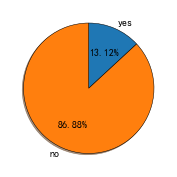

In [26]:
sub = Sub()
sub.get_data(train['subscribe'])
sub.table()
try:
    sub.picture()
except ValueError:
    pass

数据可视化

In [54]:
train.head(10)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,0,0,5,0,2,2,0,1,...,1,112,2,0,1.4,90.81,-35.53,0.69,5219.74,0
1,2,50,7,1,3,1,2,0,0,6,...,1,412,2,1,-1.8,96.33,-40.58,4.05,4974.79,1
2,3,48,1,0,2,0,0,0,0,0,...,0,1027,1,0,-1.8,96.33,-44.74,1.50,5022.61,0
3,4,26,2,2,3,2,2,2,0,1,...,26,998,0,1,1.4,97.08,-35.55,5.11,5222.87,1
4,5,45,0,2,6,0,0,0,0,7,...,1,240,4,2,-3.4,89.82,-33.83,1.17,4884.70,0
5,6,47,4,1,7,0,0,0,0,3,...,1,10,3,1,1.4,94.58,-30.37,3.55,5257.02,0
6,7,33,9,1,3,0,2,0,0,1,...,2,1009,0,1,1.4,94.93,-35.12,4.74,5018.97,0
7,8,40,9,1,2,2,0,1,0,0,...,36,934,4,2,1.4,94.44,-33.52,4.61,5452.31,0
8,9,47,7,1,3,0,0,0,0,1,...,0,959,0,1,1.4,95.40,-37.65,5.09,5358.80,0
9,10,53,3,1,7,0,0,0,0,1,...,0,594,6,2,-2.9,93.17,-28.27,2.30,4988.07,1


In [7]:
train.describe()

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,11250.500000,40.407511,1146.303733,3.364800,773.991956,1.316444,0.078529,93.548785,-39.877180,3.302490,5137.211285
std,6495.334864,12.086078,1432.432125,7.223837,326.934334,1.918733,1.573831,2.805786,5.805442,1.611777,170.670611
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.640000,-53.280000,0.600000,4715.420000
25%,5625.750000,32.000000,143.000000,1.000000,557.750000,0.000000,-1.800000,91.190000,-44.160000,1.430000,5008.510000
50%,11250.500000,38.000000,353.000000,1.000000,964.000000,0.000000,1.100000,93.540000,-40.600000,3.920000,5133.955000
75%,16875.250000,47.000000,1873.000000,3.000000,1005.000000,2.000000,1.400000,95.920000,-35.797500,4.830000,5267.677500
max,22500.000000,101.000000,5149.000000,57.000000,1048.000000,6.000000,1.400000,99.460000,-25.550000,5.270000,5489.500000


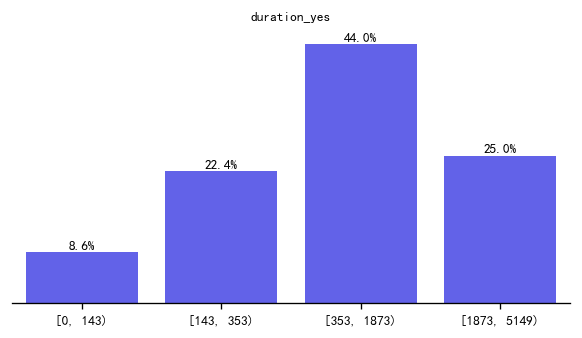

In [17]:
bins = [0, 143, 353, 1873, 5149]
df1 = train[train['subscribe']=='yes']
binning = pd.cut(df1['duration'], bins, right=False)
time = pd.value_counts(binning)
time = time.sort_index()
fig = plt.figure(figsize=(6,3),dpi=120)
sns.barplot(time.index, time, color='blue', alpha=0.7)
x = np.arange(len(time))
y = time.values
for x_loc,job in zip(x,y):
    plt.text(x_loc, job+2, '{:.1f}%'.format(job/sum(time)*100), ha='center', va='bottom', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks([])
plt.ylabel('')
plt.title('duration_yes', size=8)
sns.despine(left=True)
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')

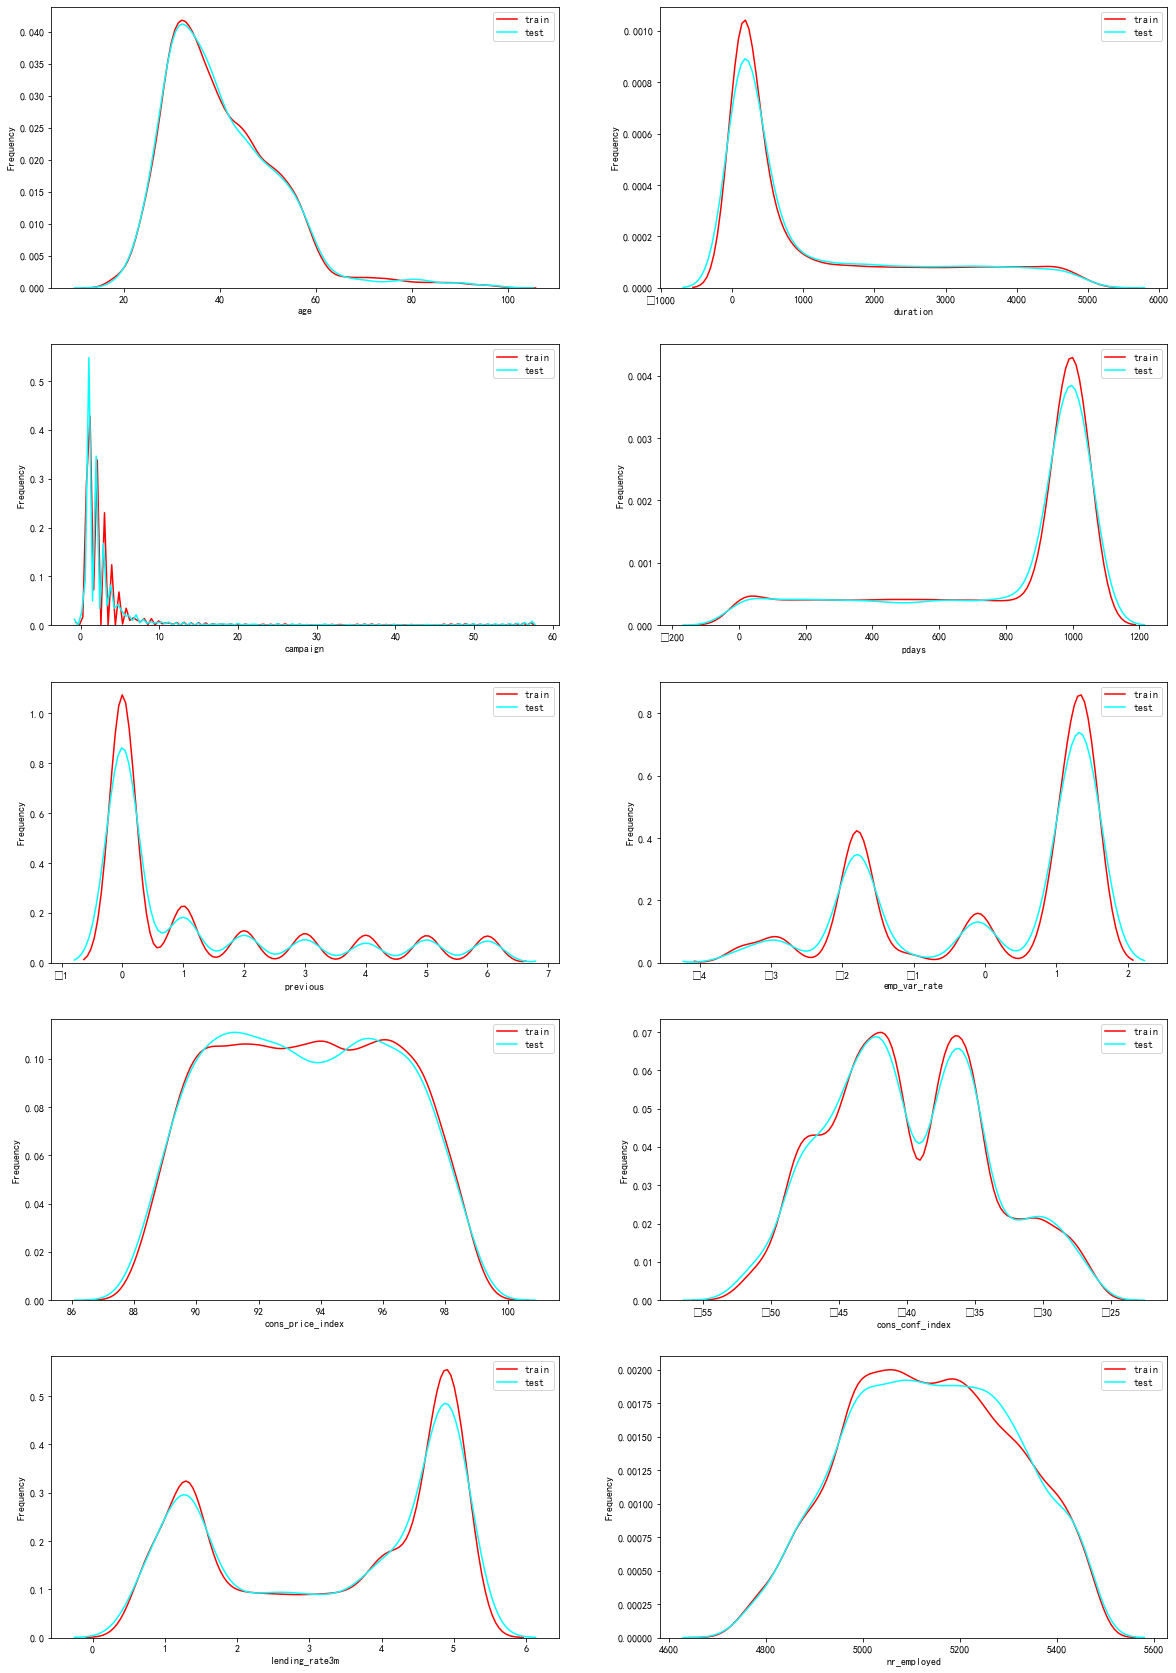

In [22]:
#数值类型
plt.figure(figsize=(20,30))
i = 1
for n in num:
    ax = plt.subplot(5,2,i)
    ax = sns.kdeplot(train[n], color='red')
    ax = sns.kdeplot(test[n], color='cyan')
    ax.set_xlabel(n)
    ax.set_ylabel('Frequency')
    ax.legend(['train','test'])
    i+=1
plt.show()

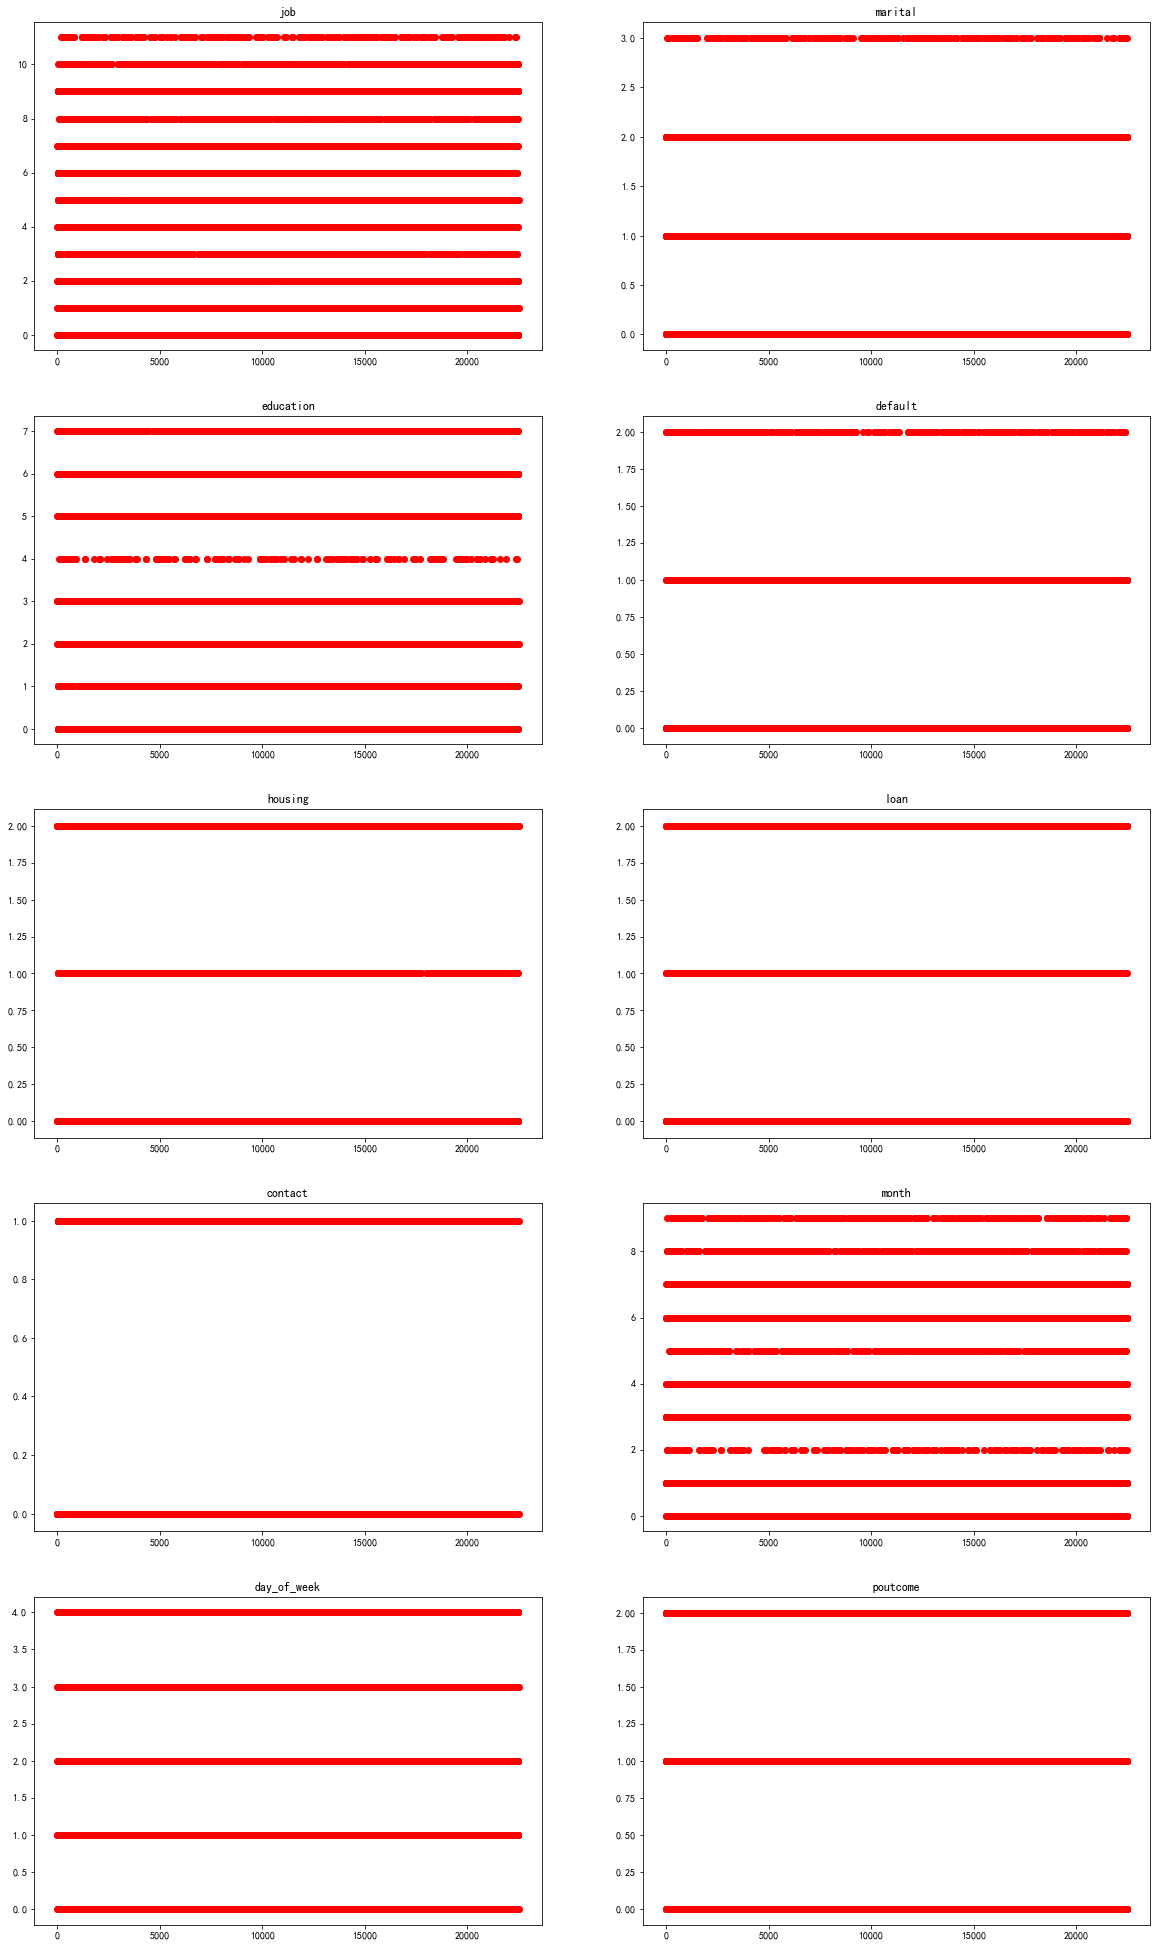

In [56]:
#分类类型
j=1
plt.figure(figsize=(20,35))
for n in cat:
    ax = plt.subplot(5,2,j)
    ax = plt.scatter(x=range(len(train)), y=train[n], color='red')
    plt.title(n)
    j+=1
plt.show()

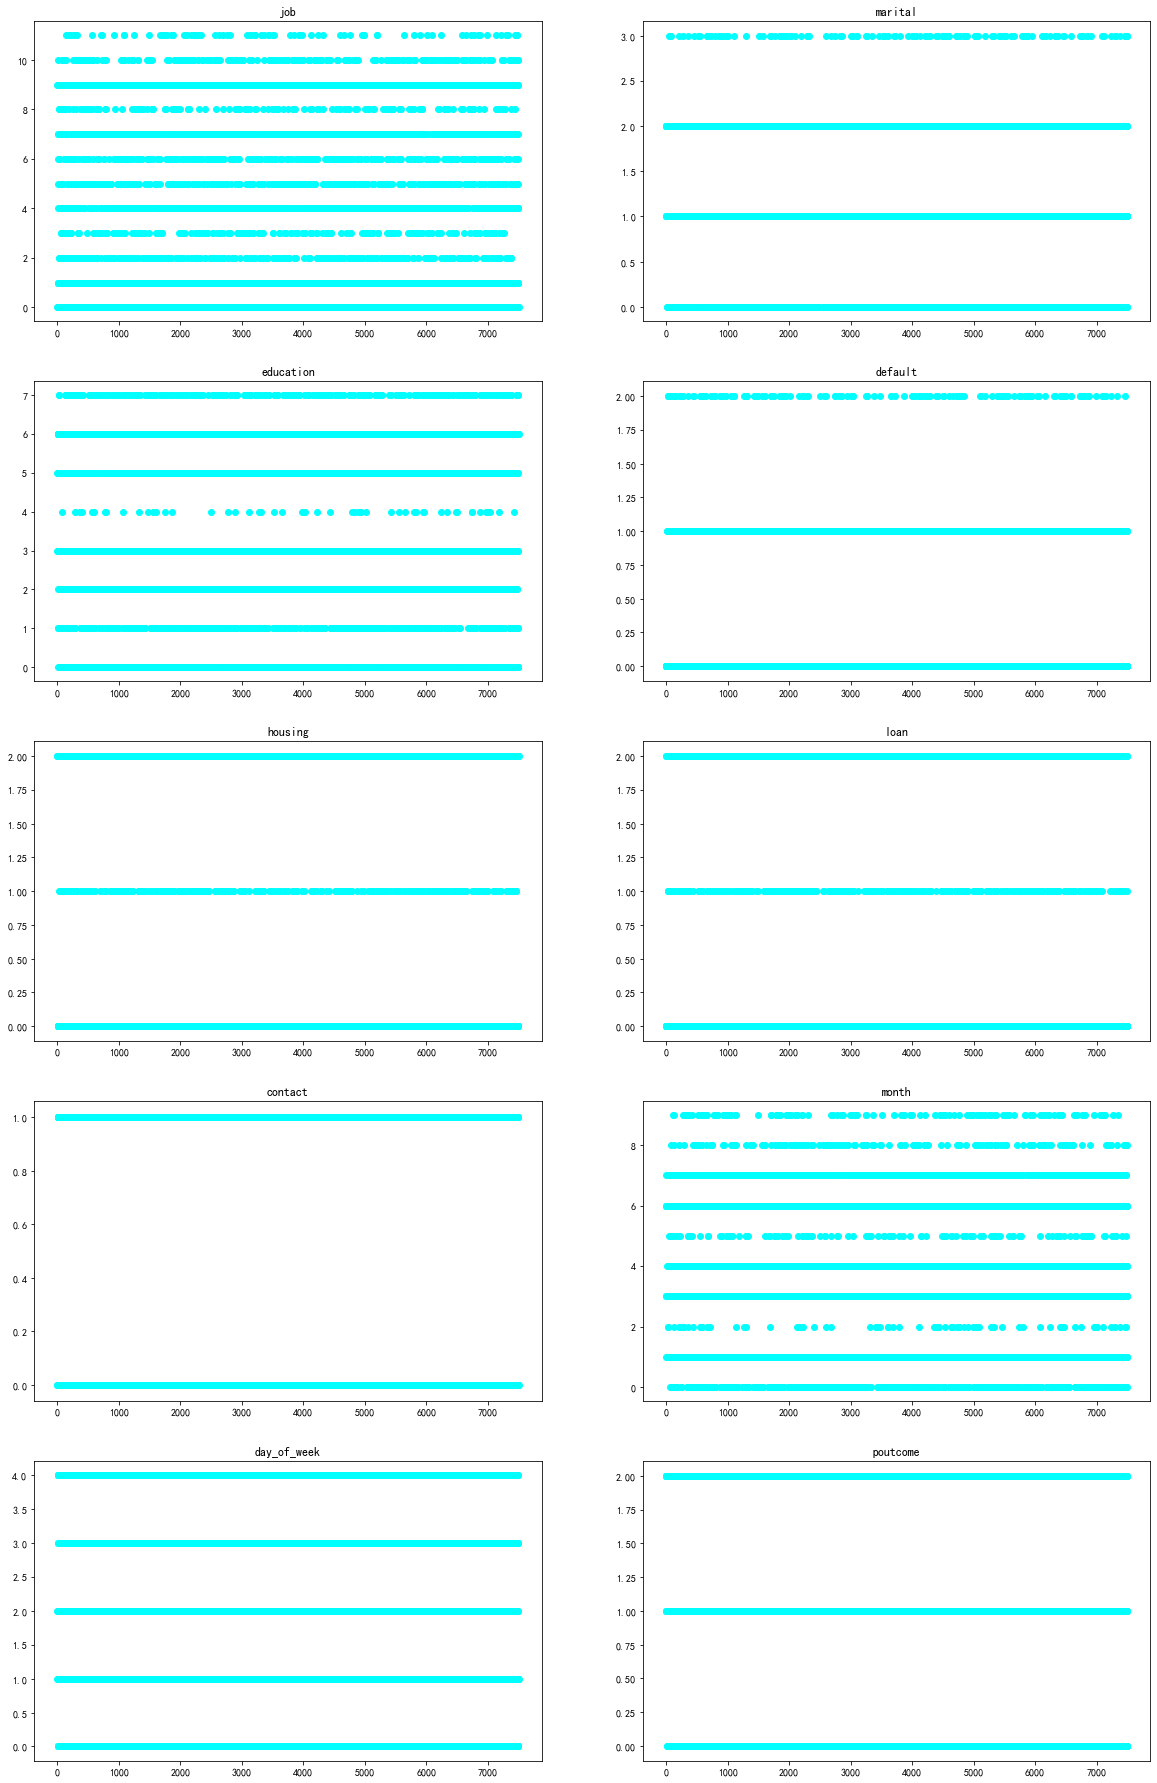

In [57]:
k=1
plt.figure(figsize=(20,32))
for n in cat:
    ax = plt.subplot(5,2,k)
    ax = plt.scatter(x=range(len(test)), y=test[n], color='cyan')
    plt.title(n)
    k+=1
plt.show()

C:\Users\86181\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
C:\Users\86181\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.


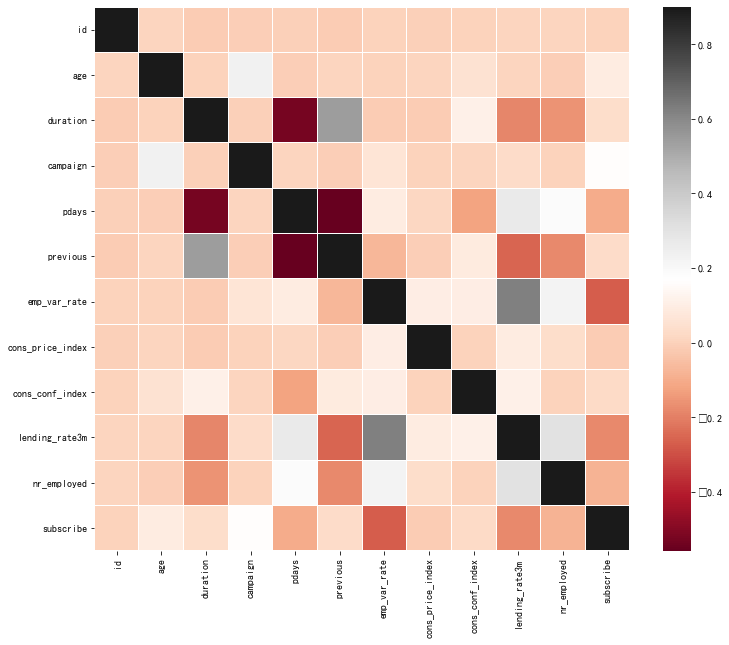

In [7]:
train['subscribe'] = train['subscribe'].replace(['no','yes'],[0,1])
cor_m = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor_m, vmax=0.9, linewidths=0.05, cmap='RdGy')

In [65]:
r1 = np.corrcoef(train['pdays'],train['duration'])
print(r1)
r2 = np.corrcoef(train['previous'],train['pdays'])
print(r2)
r3 = np.corrcoef(train['emp_var_rate'], train['lending_rate3m'])
print(r3)
r4 = np.corrcoef(train['previous'],train['duration'])
r4

[[ 1.         -0.52545147]
 [-0.52545147  1.        ]]
[[ 1.         -0.55818993]
 [-0.55818993  1.        ]]
[[1.         0.62377952]
 [0.62377952 1.        ]]


array([[1.        , 0.54122537],
       [0.54122537, 1.        ]])

建模

In [21]:
target = LabelEncoder().fit_transform(train['subscribe'])
#将['subscribe']赋予序号（['subscribe'] ==> [排序后对应的序号]
x = train[[i for i in train.columns if i != 'subscribe' and i != 'id']]
x_train, x_test, y_train, y_test = train_test_split(x,target,test_size = 0.2,random_state=111)

In [19]:
le = LabelEncoder()
train['job'] = le.fit_transform(train['job'])
train['marital'] = le.fit_transform(train['marital'])
train['education'] = le.fit_transform(train['education'])
train['default'] = le.fit_transform(train['default'])
train['housing'] = le.fit_transform(train['housing'])
train['loan'] = le.fit_transform(train['loan'])
train['contact'] = le.fit_transform(train['contact'])
train[ 'month'] = le.fit_transform(train[ 'month'])
train['day_of_week'] = le.fit_transform(train['day_of_week'])
train['poutcome'] = le.fit_transform(train['poutcome'])

xgboost

In [22]:
clf = XGBClassifier()
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [42]:
y_test_pre = clf.predict(x_test)

acc_test = clf.score(x_test,y_test)
acc_train = clf.score(x_train,y_train)
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pre)
print("confusion_matrix:\n", confusion_matrix)
#(y,pre) 
#[#(y=0,pre=0)   #(y=0,pre=1)
# #(y=1,pre=0)   #(y=1,pre=1)]
print("Accuracy on train:\n", acc_train)
print("Accuracy on test:\n", acc_test)

confusion_matrix:
 [[3748  156]
 [ 382  214]]
Accuracy on train:
 0.9723333333333334
Accuracy on test:
 0.8804444444444445


In [20]:
#以colsample_bytree举例
parameters = {
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8,0.9,1],
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(max_depth = 6,colsample_bytree = 0.9,subsample = 0.5,min_split_gain = 0.01),param_grid=parameters,scoring='accuracy',cv = 5)
gsearch2 = GridSearchCV(estimator=XGBClassifier(max_depth = 6,colsample_bytree = 0.5,subsample = 0.5,min_split_gain = 0.01),param_grid=parameters,scoring='accuracy',cv = 5)
gsearch3 = GridSearchCV(estimator=XGBClassifier(max_depth = 6,colsample_bytree = 0.7,subsample = 0.5,min_split_gain = 0.01),param_grid=parameters,scoring='accuracy',cv = 5)

gsearch1.fit(x_train,y_train)
gsearch2.fit(x_train,y_train)
gsearch3.fit(x_train,y_train)
#print(gsearch.best_params_,gsearch.best_score_)

[11:24:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:24:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:24:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.


[11:25:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:25:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:25:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.


[11:25:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:25:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:25:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.


[11:33:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:33:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:33:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.


[11:34:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:34:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:34:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_split_gain" } might not be used.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_...
                                     min_split_gain=0.01, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                   

In [19]:
print(gsearch1.score(x_test,y_test))
print(gsearch2.score(x_test,y_test))
gsearch3.score(x_test,y_test)

0.8766666666666667

逻辑回归

In [12]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(solver='liblinear')
logi.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_test_pre1 = logi.predict(x_test)
confusion_matrix1 = metrics.confusion_matrix(y_test,y_test_pre1)
acc_test1 = logi.score(x_test,y_test)
acc_train1 = logi.score(x_train,y_train)
print("confusion_matrix:\n", confusion_matrix1)
print("Accuracy on train:\n", acc_train1)
print("Accuracy on test:\n", acc_test1)

confusion_matrix:
 [[3860   44]
 [ 547   49]]
Accuracy on train:
 0.8708333333333333
Accuracy on test:
 0.8686666666666667


In [14]:
a = logi.coef_.ravel()
coef = np.concatenate([a, logi.intercept_])
coef = np.round(coef,3)
print(coef)
ind = list(train.columns)
del ind[0]
del ind[-1]
ind = ind+['intercept']
ind
co = pd.DataFrame({'variable':ind,'coef':coef})

[ 0.013  0.024  0.295  0.045  0.053 -0.058  0.048 -0.228 -0.024  0.061
  0.     0.047 -0.001 -0.059  0.179 -0.459 -0.001  0.011 -0.032 -0.
 -0.004]


In [15]:
#ROC曲线
pred_pr_lr = logi.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(y_test,pred_pr_lr,pos_label=2)
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


ValueError: bad input shape (4500, 2)

预测

In [55]:
test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,35,9,2,5,0,2,2,0,1,1,3295,1,476,0,2,1.4,95.37,-33.04,3.63,5204.54
1,26,0,2,3,0,2,0,0,6,2,2872,1,166,2,2,-1.8,91.75,-44.42,3.16,4924.78
2,44,1,1,1,0,0,0,1,6,1,268,3,968,0,1,1.1,89.67,-36.90,5.04,4947.02
3,36,1,1,2,0,2,0,1,7,2,30,1,432,5,2,-0.1,89.87,-41.66,3.27,5203.33
4,41,1,1,0,0,2,0,1,6,2,1670,1,944,3,2,1.1,97.64,-36.32,3.95,4992.02
5,24,7,2,3,0,0,2,0,3,2,126,1,976,0,1,1.4,89.31,-43.34,4.75,4992.83
6,25,0,2,3,0,0,0,0,3,0,2493,2,7,1,1,1.4,97.62,-46.67,0.84,5154.56
7,33,0,2,6,0,0,2,0,1,3,597,1,547,6,0,1.4,90.92,-29.99,2.74,5033.87
8,41,0,1,6,0,2,0,0,1,4,341,1,1023,0,1,1.4,93.53,-36.20,4.80,5097.39
9,49,0,0,6,0,2,0,0,3,4,121,3,1005,0,1,1.4,89.40,-40.73,4.87,5306.52


In [23]:
test['job'] = le.fit_transform(test['job'])
test['marital'] = le.fit_transform(test['marital'])
test['education'] = le.fit_transform(test['education'])
test['default'] = le.fit_transform(test['default'])
test['housing'] = le.fit_transform(test['housing'])
test['loan'] = le.fit_transform(test['loan'])
test['contact'] = le.fit_transform(test['contact'])
test[ 'month'] = le.fit_transform(test[ 'month'])
test['day_of_week'] = le.fit_transform(test['day_of_week'])
test['poutcome'] = le.fit_transform(test['poutcome'])
#test = test.drop('id',axis = 1)

In [48]:
test_pre1 = clf.predict(test)
test_pre1   #575

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
test_pre2 = logi.predict(test)
print(len(test_pre2))
test_pre2

7500


array([0, 0, 0, ..., 0, 0, 0])

In [51]:
print(np.sum(test_pre1))
print(np.sum(test_pre2))
np.sum(test_pre1 == test_pre2)

575
149


6930

In [43]:
submission = pd.read_csv(r'C:\Users\86181\Desktop\Learning\programming\ML\data_format2\submission.csv')

submission = submission.drop('subscribe',axis = 1)
submission.head()

,id
0,22501
1,22502
2,22503
3,22504
4,22505


In [44]:
pre_map = {1:'yes',0:'no'}
submission['subcribe'] = [pre_map[x] for x in test_pre]
submission.head()

,id,subcribe
0,22501,no
1,22502,no
2,22503,no
3,22504,no
4,22505,no


In [50]:
submission.to_csv(path_or_buf = r"C:\Users\86181\Desktop\Learning\programming\ML\data_format2\submission.csv",index = False)